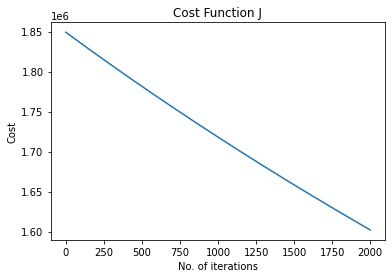



Learning rate :  3e-05
Theta:  [ 2.13456169e+00  1.04363119e-01  1.02384744e+00  5.93882102e-01
  6.24172115e-01 -5.28212088e-04  4.36864273e-01  4.56618123e-01
  5.38614881e-01  3.63213260e-01  7.16638291e-01 -1.13659859e-01
  2.19620762e-01 -2.94096426e-01]
Theta Shape (14,)
MAE:  12.387985230378339
MSE:  182.4300028105179


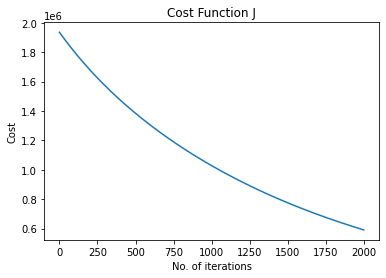



Learning rate :  0.0003
Theta:  [11.02666151 -0.01195815  1.11003937 -0.2183944   1.04192747  0.10835672
  2.88225752 -0.01347256  0.14835079  0.0539159  -0.585479   -0.78114917
  0.43828866 -1.64747079]
Theta Shape (14,)
MAE:  11.688294601659639
MSE:  153.5919972236992


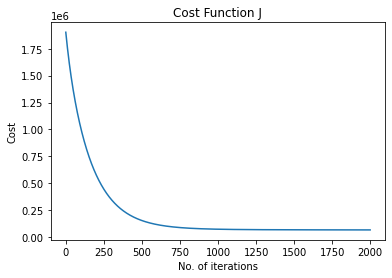



Learning rate :  0.003
Theta:  [24.27590744 -0.89657417  0.74274219 -0.04351186  0.59719236 -0.90219661
  3.85355333  0.05130225 -2.11022088  1.66968654 -0.79076003 -1.6206053
  0.12025211 -3.46630149]
Theta Shape (14,)
MAE:  4.59155480517548
MSE:  30.698887331419048


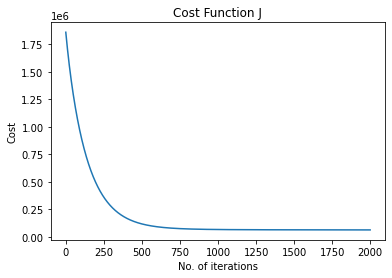



Learning rate :  0.0035
Theta:  [ 2.43129607e+01 -9.61757937e-01  7.67908521e-01 -3.95918217e-02
  5.76828646e-01 -9.80952851e-01  3.81877323e+00 -1.14529674e-02
 -2.24422332e+00  1.87820489e+00 -9.32879026e-01 -1.64648079e+00
  9.17022198e-02 -3.45552825e+00]
Theta Shape (14,)
MAE:  4.704041473369082
MSE:  32.02407629136293


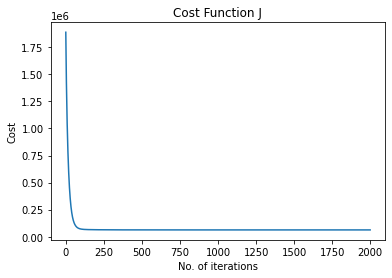



Learning rate :  0.03
Theta:  [24.3345     -1.14316952  1.121236    0.35707254  0.48544164 -1.70560762
  3.5820636   0.07497071 -2.81613386  3.04630372 -1.969263   -1.79332693
 -0.05216838 -3.5021252 ]
Theta Shape (14,)
MAE:  5.140061167729839
MSE:  37.86546005165399


In [2]:
import numpy as np
from sklearn import datasets,metrics
import sklearn
import matplotlib.pyplot as plt

x,y=datasets.load_boston(return_X_y=True)

x_train_temp1=x[0:400,:]
x_train=np.zeros((x_train_temp1.shape[0],x_train_temp1.shape[1]+1))
x_train[:,0]=np.ones((x_train_temp1.shape[0]))
x_train[:,1:]=x_train_temp1
y_train=y[0:400]

x_test_temp1=x[400:506,: ]
x_test=np.zeros((x_test_temp1.shape[0],x_test_temp1.shape[1]+1))
x_test[:,0]=np.ones((x_test_temp1.shape[0]))
x_test[:,1:]=x_test_temp1
y_test=y[400:506]

scaler=sklearn.preprocessing.StandardScaler()

scaler.fit(x_train[:,1:])
x_train[:,1:]=scaler.transform(x_train[:,1:])
x_test[:,1:]=scaler.transform(x_test[:,1:])

m=x_train.shape[0]
n=x_train.shape[1]
alp=[0.00003,0.0003,0.003,0.0035,0.03]
for k in alp:
    theta=np.random.uniform(0,1,size=(x_train.shape[1]))

    iteration=2000
    alpha=k
    cost=[]
    for i in range(iteration):
        update=np.zeros(x_train.shape[1])
        ypred=np.dot(x_train,theta)
        error=ypred-y_train
        cost.append((1/2*n)*np.sum(error**2))
        for j in range(n):
            update[j]=np.sum(error*(x_train.T)[j])
        theta=theta-(1/m)*(alpha)*update

    plt.title('Cost Function J')
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(cost)),cost)
    plt.show()
    print("\n\nLearning rate : ",k)
    print("Theta: ",theta)
    print("Theta Shape",theta.shape)

    predict=np.dot(x_test,theta)

    print("MAE: ",metrics.mean_absolute_error(y_true=y_test,y_pred=predict))
    print("MSE: ",metrics.mean_squared_error(y_true=y_test,y_pred=predict))
